In [2]:
#libraries
import pandas as pd

In [8]:
aislesDF = pd.read_csv('data/aisles.csv')
departmentDF = pd.read_csv('data/departments.csv')
Order_Products_Prior_DF = pd.read_csv('data/order_products__prior.csv')
Order_Products_Train_DF = pd.read_csv('data/order_products__train.csv')
ordersDF = pd.read_csv('data/orders.csv')
productsDF = pd.read_csv('data/products.csv')

In [20]:
aislesDF.head(2)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses


In [12]:
departmentDF.head(2)

,department_id,department
0,1,frozen
1,2,other


In [25]:
Order_Products_Prior_DF.head(2)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1


In [124]:
Order_Products_Train_DF.head(2)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1


In [122]:
ordersDF.head(2)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


**order_dow is day of week**

In [75]:
order_dow_freq = ordersDF['order_dow'].value_counts().sort_index()
order_dow_freq

0    600905
1    587478
2    467260
3    436972
4    426339
5    453368
6    448761
Name: order_dow, dtype: int64

In [76]:
order_dow_freq.index=['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri']
order_dow_freq

Sat     600905
Sun     587478
Mon     467260
Tue     436972
Wed     426339
Thur    453368
Fri     448761
Name: order_dow, dtype: int64

In [77]:
import matplotlib.pyplot as plt

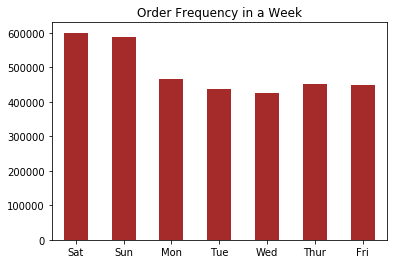

In [78]:
fig = plt.figure()
order_dow_freq.plot(kind='bar', color="brown")
plt.xticks(rotation=0)
plt.title('Order Frequency in a Week')
plt.show()

Hour of day frequency

In [79]:
order_hod_freq = ordersDF['order_hour_of_day'].value_counts().sort_index()
order_hod_freq

0      22758
1      12398
2       7539
3       5474
4       5527
5       9569
6      30529
7      91868
8     178201
9     257812
10    288418
11    284728
12    272841
13    277999
14    283042
15    283639
16    272553
17    228795
18    182912
19    140569
20    104292
21     78109
22     61468
23     40043
Name: order_hour_of_day, dtype: int64

In [80]:
order_hod_freq.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
order_hod_freq

1      22758
2      12398
3       7539
4       5474
5       5527
6       9569
7      30529
8      91868
9     178201
10    257812
11    288418
12    284728
13    272841
14    277999
15    283042
16    283639
17    272553
18    228795
19    182912
20    140569
21    104292
22     78109
23     61468
24     40043
Name: order_hour_of_day, dtype: int64

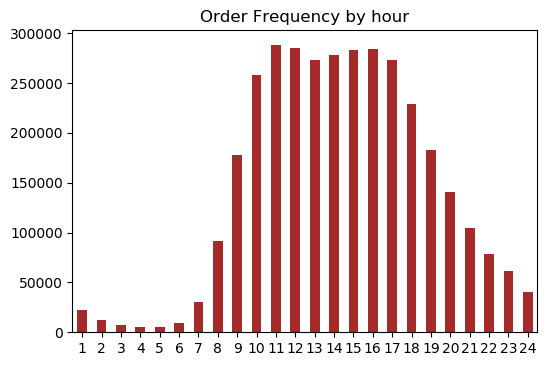

In [81]:
fig = plt.figure()
order_hod_freq.plot(kind='bar', color="brown")
plt.xticks(rotation=0)
plt.title('Order Frequency by hour')
fig.set_dpi(100)
plt.show()

In [111]:
reorder_days_freq = ordersDF['days_since_prior_order'].value_counts().sort_index()
reorder_days_freq

0.0      67755
1.0     145247
2.0     193206
3.0     217005
4.0     221696
5.0     214503
6.0     240013
7.0     320608
8.0     181717
9.0     118188
10.0     95186
11.0     80970
12.0     76146
13.0     83214
14.0    100230
15.0     66579
16.0     46941
17.0     39245
18.0     35881
19.0     34384
20.0     38527
21.0     45470
22.0     32012
23.0     23885
24.0     20712
25.0     19234
26.0     19016
27.0     22013
28.0     26777
29.0     19191
30.0    369323
Name: days_since_prior_order, dtype: int64

In [99]:
import numpy as np

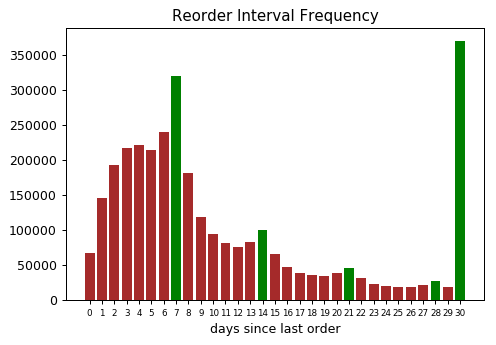

In [120]:
fig = plt.figure()

color_list = ['brown'] * len(order_interval_count.index)
summit  = [7,14,21,28,30] 
for i in summit:
    color_list[i] = 'green'
    
plt.bar(reorder_days_freq.index, reorder_days_freq, color=color_list)
plt.xticks(np.arange(len(reorder_days_freq.index)), rotation=0,fontsize=7)
plt.xlabel('days since last order')
plt.title('Reorder Interval Frequency')
fig.set_dpi(90)
plt.show()


### Popular Items in Shopping Cart History
In this part, let's see what are the most popular items on customers' order lists.

First take a look at each dataset, and then merge them into one dataframe with all the following included:

    user_id
    order_id
    product_id
    product_name

In [129]:
# All orders (prior & train): order_id, product_id
All_Order_Product=pd.concat([Order_Products_Prior_DF, Order_Products_Train_DF])

In [130]:
# orders in prior/train merged with product names
Order_Product_Name_Prior = pd.merge(Order_Products_Prior_DF, 
                                    productsDF, how='left', on='product_id')
Order_Product_Name_Train = pd.merge(Order_Products_Train_DF, 
                                    productsDF, how='left', on='product_id')

In [131]:
# Prior orders with user_id, product_id, product_name
Prior_User_Order_Product = pd.merge(Order_Product_Name_Prior, 
                                    ordersDF, how='left', on='order_id')

In [132]:
# Now we have all we need: order_id, product_id, user_id, product_name
Prior_User_Order_Product.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0


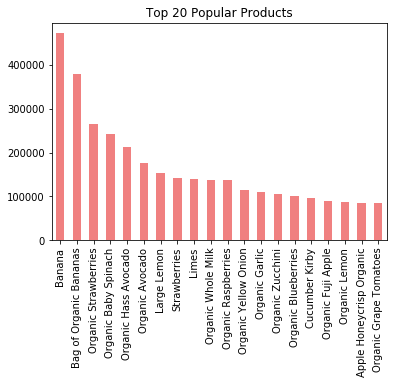

In [133]:
# top 20 most popular products
Products_Count = Prior_User_Order_Product['product_name'].value_counts()
fig = plt.figure()
Products_Count[0:20].plot(kind="bar", color='lightcoral')
plt.xticks(rotation=90)
plt.title('Top 20 Popular Products')
plt.show()
#fig.set_dpi(200)
#fig.savefig('../figs/Top_20_Popular_Products.png')